In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pprint import pprint

import numpy as np
from sklearn.preprocessing import scale
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
import matplotlib.animation as ani

import mlgrad.models as models
import mlgrad.regr as regr
import mlgrad.cls as cls
import mlgrad.plots as plots
import mlgrad.funcs as funcs
import mlgrad.funcs2 as funcs2
import mlgrad.loss as loss
import mlgrad.gd as gd
import mlgrad.smooth as smooth
import mlgrad.array_transform as at
from mlgrad.af import averaging_function
import mlgrad.avragg as avragg

import rampy
import pybaselines
import random

from irsa import io
from irsa.preprocess import despike, utils
import irsa.widgets as widgets

import scipy.special as special

import copy

import ipywidgets
from IPython.display import display

# %matplotlib widget

In [2]:
path = f"/home/intellimath/repos/spectras/bacteria1024"
options = {}
dd = {}
widgets.load_spectras(path, dd, options)

Box(children=(VBox(children=(Label(value='дата:', style=LabelStyle(font_size='8pt', font_weight='bold')), Sele…

Button(description='Select', style=ButtonStyle())

Output()

{}

In [3]:
d_keys = list(dd.keys())
sel_i = 0
sel = ipywidgets.Select(options=d_keys,  description="Experiment:", rows=len(dd)+1)
sel.layout.width="50%"

In [4]:
for i, key in enumerate(dd):
    entry1 = dd[key]
    entry1.crop(40)
    entry1.allign_bottom()


In [5]:
@ipywidgets.interact(key=sel)
def plot_spectra_for_key(key):
    entry = dd[key]
    entry.plot_spectras()

interactive(children=(Select(description='Experiment:', layout=Layout(width='50%'), options=('SA_100_S_less100…

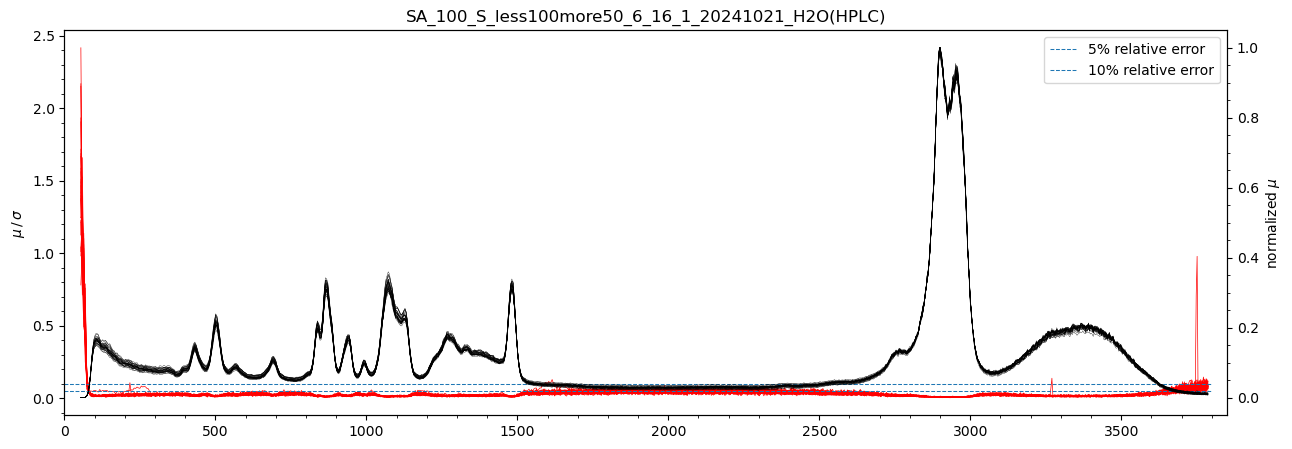

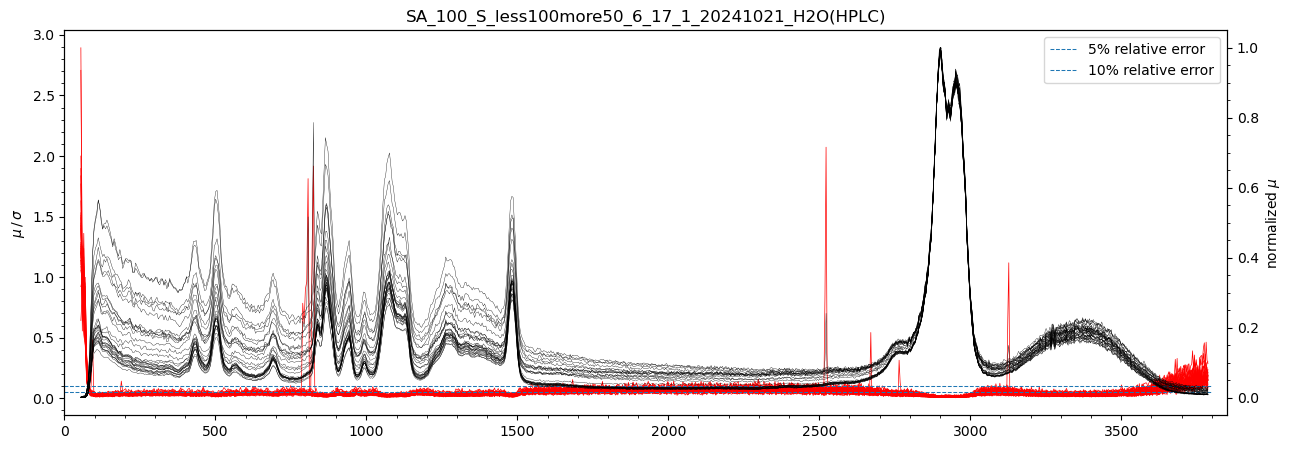

In [6]:
for i, key in enumerate(dd):
    entry = dd[key]
    N = len(entry.y)
    plt.figure(figsize=(15,5))
    plt.title(key)
    ax1 = plt.gca()
    ax2 = plt.twinx(ax1)
    xs, ys = entry.x, entry.y
    for x,y in zip(xs,ys):
        sigma = np.std(y, axis=0)
        mu = np.mean(y, axis=0)
        l2 = ax2.plot(x, mu/np.max(mu), linewidth=0.25, color='k')
        l1 = ax1.plot(x, sigma/mu, linewidth=0.5, color='r')
    ax1.set_ylabel(r"$\mu\,/\,\sigma$")
    ax2.set_ylabel(r"normalized $\mu$")
    ax1.minorticks_on()
    ax2.minorticks_on()
    l3 = ax1.hlines(0.05, 0, 3800, linestyle='--', linewidths=0.75, label=r"5% relative error")
    l4 = ax1.hlines(0.1, 0, 3800, linestyle='--', linewidths=0.75, label=r"10% relative error")
    ax1.legend()
    plt.xlim(0,3850)
    plt.savefig(key + ".jpg")
    plt.show()

In [7]:
d2 = {}
for i, key in enumerate(dd):
    entry2 = dd[key]
    d2[key] = entry2.robust_averaging(tau=3.0)


In [8]:
for key in d2:
    entry = d2[key]
    entry.scale(scale=500.0)
    # entry.apply_func(y_func=np.log, x_func=np.log, b=1)
    